In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Work/Cemex/DL_Tasks/01-Face_Detection')


# 1. Install Dependencies and Setup

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
%matplotlib inline

#plotly
import plotly.graph_objects as go
import plotly.express as px

# import tensorflow.compat.v1 as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
from torchsummary import summary
import torch.utils.data as data

import zipfile

import shutil
import os
import pandas as pd

# Downloading and Extracing The Data

In [ ]:
#make directory to store the data
!mkdir data_faces

mkdir: cannot create directory ‘data_faces’: File exists


In [ ]:
#Download the data from the link
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

--2024-04-07 03:52:45--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.216.56, 52.219.113.8, 52.219.193.56, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.216.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip.2’

celeba.zip.2        100%[===================>]   1.34G  34.4MB/s    in 41s     

2024-04-07 03:53:27 (33.6 MB/s) - ‘celeba.zip.2’ saved [1443490838/1443490838]



In [ ]:
with zipfile.ZipFile("celeba.zip.2","r") as zip_ref :
  zip_ref.extractall("data_faces/")

# 2. Loading and Visualizing the data

In [ ]:
image_root = '/content/drive/MyDrive/Colab_Notebooks/Cemex_Technical_Assignment'
#Reading the csv File
df = pd.read_csv(image_root+"/list_attr_celeba.csv")
#Exploring our csv
df.head()
df.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,-0.777728,-0.466039,0.02501,-0.590857,-0.955113,-0.696849,-0.518408,-0.530935,-0.521498,-0.704016,...,-0.886979,-0.035839,-0.583196,-0.360866,-0.62215,-0.903079,-0.055129,-0.754066,-0.854570,0.547234
std,0.628602,0.884766,0.99969,0.806778,0.296241,0.717219,0.855135,0.847414,0.853255,0.710186,...,0.461811,0.999360,0.812333,0.932620,0.78290,0.429475,0.998482,0.656800,0.519338,0.836982
min,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,-1.000000,-1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,-1.000000,1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dropping the unimportant comlumns
df = df[['image_id','Smiling']]
df.head()

,image_id,Smiling
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
#Checking Existance of null data in the dataset
df.isnull().sum()

image_id    0
Smiling     0
dtype: int64

In [ ]:
#checking if the dataset is balance or not
Smile = df[df['Smiling'] == 1]['Smiling'].count()
No_smile = df[df['Smiling'] == -1]['Smiling'].count()
total = Smile+No_smile
print(f"The images with smile are {Smile} with {Smile*100/total}%")
print(f"The images with smile are {No_smile} with {No_smile*100/total}%")

The images with smile are 97669 with 48.20803656483991%
The images with smile are 104930 with 51.79196343516009%


observasion:from the previous data, we can tell that the data are approximatly balanced, the number of smile images is quite equal the number of no smile images

Taking a part of the dataset to train our model, the data is too big and will take time in the train.

Lets say we will take 20000 images, 10000 with smile and 10000 with no smile

In [ ]:
image_name = '/content/drive/MyDrive/Work/Cemex/DL_Tasks/01-Face_Detection/data_faces/img_align_celeba/000001.jpg'

In [ ]:
#keeping our dataset balance

#Make train data folder
!mkdir train_data && mkdir train_data/smile && mkdir train_data/no_smile
#Make validate data folder
!mkdir validate_data && mkdir validate_data/smile && mkdir validate_data/no_smile
#Make test data folder
!mkdir test_data && mkdir test_data/smile && mkdir test_data/no_smile
#Say we need 10,000 images and we will split them 80% train, 10% validate and 10% test
num_of_images = 10000
train_size = 0.8*num_of_images      #80%
val_size =   0.1*num_of_images      #10%
test_size =  0.1*num_of_images      #10%
s0 = 0
s1 = 0

root = '/content/drive/MyDrive/Work/Cemex/DL_Tasks/01-Face_Detection/data_faces/img_align_celeba/'
for i, (_, i_row) in enumerate(df.iterrows()):
  #Put in train file
  if s0 < train_size:
    if i_row['Smiling'] == 1:
      s0 += 1
      shutil.copyfile(root + i_row['image_id'], 'train_data/smile/' + i_row['image_id'])
  #Put in validate file
  elif(s0<(train_size+val_size)):
      if i_row['Smiling'] == 1:
        s0 += 1
        shutil.copyfile(root + i_row['image_id'], 'validate_data/smile/' + i_row['image_id'])
  #Put in test file
  elif(s0<(train_size+val_size+test_size)):
      if i_row['Smiling'] == 1:
        s0 += 1
        shutil.copyfile(root + i_row['image_id'], 'test_data/smile/' + i_row['image_id'])

  #Put in train file
  if s1 < train_size:
    if i_row['Smiling'] == -1:
      s1 += 1
      shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'], 'train_data/no_smile/' + i_row['image_id'])
  #Put in validate file
  elif(s1<(train_size+val_size)):
    if i_row['Smiling'] == -1:
      s1 += 1
      shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'], 'validate_data/no_smile/' + i_row['image_id'])

  #Put in validate file
  elif(s1<(train_size+val_size+test_size)):
    if i_row['Smiling'] == -1:
      s1 += 1
      shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'], 'test_data/no_smile/' + i_row['image_id'])

    if s0 == num_of_images/2 and s1 == num_of_images/2:
      break

^C


#3. Load the data

In [4]:
input_image= (178,218)
train_data = tf.keras.utils.image_dataset_from_directory('train_data',
                                                        batch_size=32,
                                                        image_size=input_image,
                                                        shuffle=True)
val_data = tf.keras.utils.image_dataset_from_directory('validate_data',
                                                        batch_size=32,
                                                        image_size=input_image,
                                                        shuffle=True)
test_data = tf.keras.utils.image_dataset_from_directory('test_data',
                                                        batch_size=32,
                                                        image_size=input_image,
                                                        shuffle=True)

Found 16000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


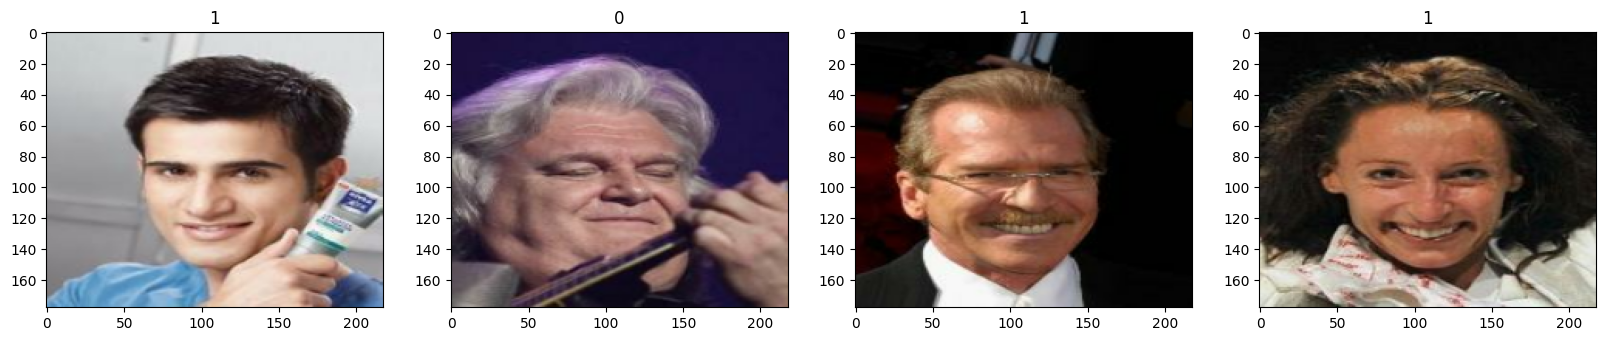

In [5]:
data_iterator = train_data.as_numpy_iterator()
#getting a batch
batch = data_iterator.next()

#Plot a batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **4 Preprocessing on the data**

4.1 Scale the data

In [6]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

Re-plotting the images after scaling

In [7]:
scaled_iterator = train_data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

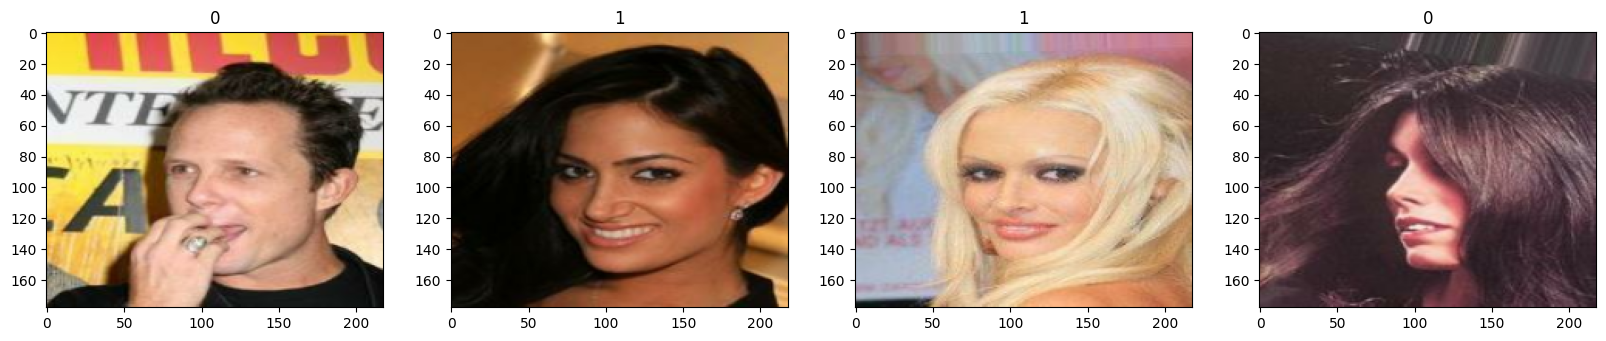

In [9]:
data_iterator = train_data.as_numpy_iterator()
#getting a batch
batch = data_iterator.next()

#Plot a batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# **6. Building Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

input_shape= (178,218,3)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 176, 216, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 88, 108, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 86, 106, 32)       4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 43, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 51, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 20, 25, 16)       

# 7. Training Model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)


In [ ]:
hist = model.fit(train_data, epochs=5, validation_data=val_data, callbacks=[early_stop])

Epoch 1/5
500/500 [==============================] - 605s 1s/step - loss: 0.3740 - accuracy: 0.8227 - val_loss: 0.3386 - val_accuracy: 0.8625
Epoch 2/5
500/500 [==============================] - 584s 1s/step - loss: 0.2483 - accuracy: 0.8967 - val_loss: 0.2573 - val_accuracy: 0.8935
Epoch 3/5
500/500 [==============================] - 576s 1s/step - loss: 0.2230 - accuracy: 0.9068 - val_loss: 0.2766 - val_accuracy: 0.8900
Epoch 4/5
500/500 [==============================] - 587s 1s/step - loss: 0.2079 - accuracy: 0.9128 - val_loss: 0.2483 - val_accuracy: 0.8920
Epoch 5/5
500/500 [==============================] - 603s 1s/step - loss: 0.1908 - accuracy: 0.9212 - val_loss: 0.2843 - val_accuracy: 0.8845


**Save the model**

In [ ]:
# Save the weights
model.save_weights('./model1_checkpoints/my_checkpoint')

# 8. Plot Performance

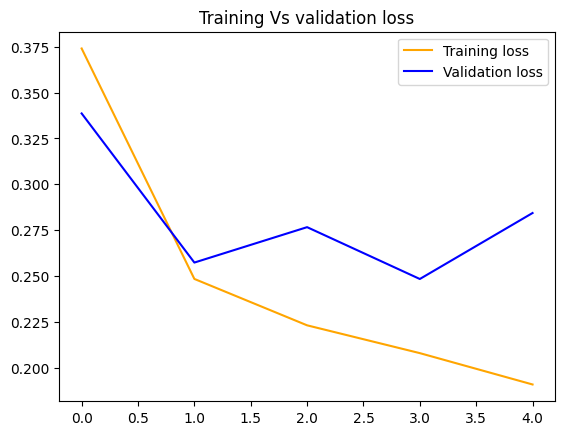

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training Vs validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

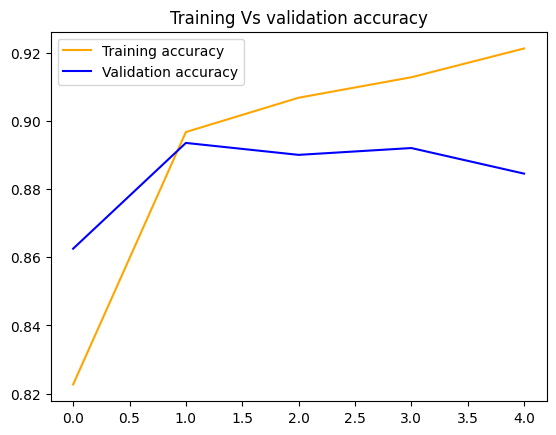

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training Vs validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# 9. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 198ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.94547564, shape=(), dtype=float32) tf.Tensor(0.815, shape=(), dtype=float32) tf.Tensor(0.884, shape=(), dtype=float32)


# 10. Trying anothor model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


# Define the CNN model
model2 = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])


In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model2.fit(train_data, epochs=5, validation_data=val_data, callbacks=[early_stop])

Epoch 1/5
500/500 [==============================] - 927s 2s/step - loss: 0.3445 - accuracy: 0.8419 - val_loss: 0.2702 - val_accuracy: 0.8840
Epoch 2/5
500/500 [==============================] - 899s 2s/step - loss: 0.2289 - accuracy: 0.9049 - val_loss: 0.2829 - val_accuracy: 0.8770
Epoch 3/5
500/500 [==============================] - 914s 2s/step - loss: 0.1736 - accuracy: 0.9282 - val_loss: 0.3282 - val_accuracy: 0.8845
Epoch 4/5
500/500 [==============================] - 896s 2s/step - loss: 0.1214 - accuracy: 0.9501 - val_loss: 0.4249 - val_accuracy: 0.8835
Epoch 5/5
500/500 [==============================] - 972s 2s/step - loss: 0.0915 - accuracy: 0.9655 - val_loss: 0.4775 - val_accuracy: 0.8800


**Save the model**

In [ ]:
# Save the weights
model2.save_weights('./model2_checkpoints/my_checkpoint')

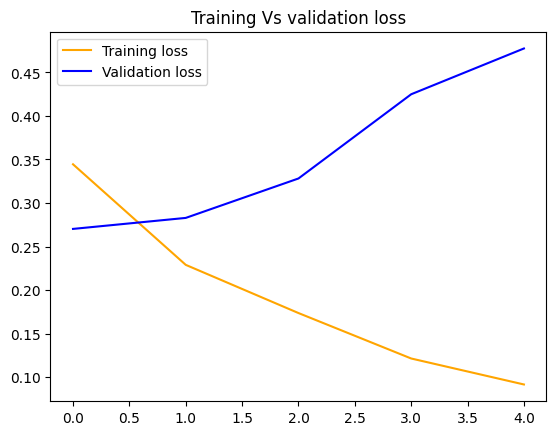

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training Vs validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

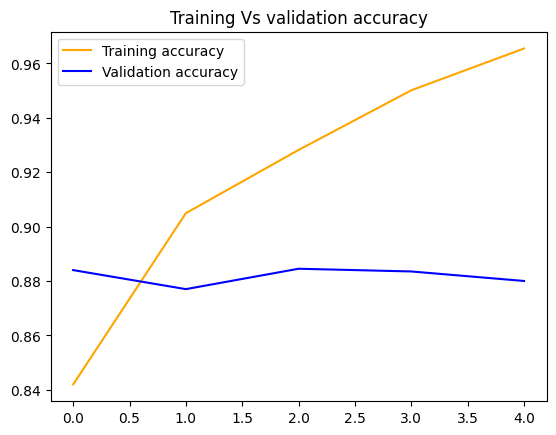

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training Vs validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 197ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.94547564, shape=(), dtype=float32) tf.Tensor(0.815, shape=(), dtype=float32) tf.Tensor(0.884, shape=(), dtype=float32)


# **11 Trying ResNet-50 model**

In [31]:
resnet_model = Sequential()
inputshape=(178,218,3)
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=inputshape,
                   pooling='avg',
                   classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(16, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))




In [32]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_7 (ModuleWr  (None, 16)                32784     
 apper)                                                          
                                                                 
 module_wrapper_8 (ModuleWr  (None, 1)                 17        
 apper)                                                          
                                                                 
Total params: 23620513 (90.11 MB)
Trainable params: 32801 (128.13 KB)
Non-trainable params: 23587712 (89.98 MB)
________

In [33]:
resnet_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [34]:
hist = resnet_model.fit(train_data, epochs=5, validation_data=val_data, callbacks=[early_stop])

Epoch 1/5
500/500 [==============================] - 3420s 7s/step - loss: 0.6912 - accuracy: 0.5386 - val_loss: 0.6920 - val_accuracy: 0.5055
Epoch 2/5
500/500 [==============================] - 3174s 6s/step - loss: 0.6764 - accuracy: 0.5708 - val_loss: 0.7063 - val_accuracy: 0.5040
Epoch 3/5
500/500 [==============================] - 3140s 6s/step - loss: 0.6680 - accuracy: 0.5863 - val_loss: 0.6677 - val_accuracy: 0.5830
Epoch 4/5
500/500 [==============================] - 3150s 6s/step - loss: 0.6604 - accuracy: 0.5988 - val_loss: 0.6510 - val_accuracy: 0.6435
Epoch 5/5
500/500 [==============================] - 3170s 6s/step - loss: 0.6467 - accuracy: 0.6268 - val_loss: 0.6416 - val_accuracy: 0.6620


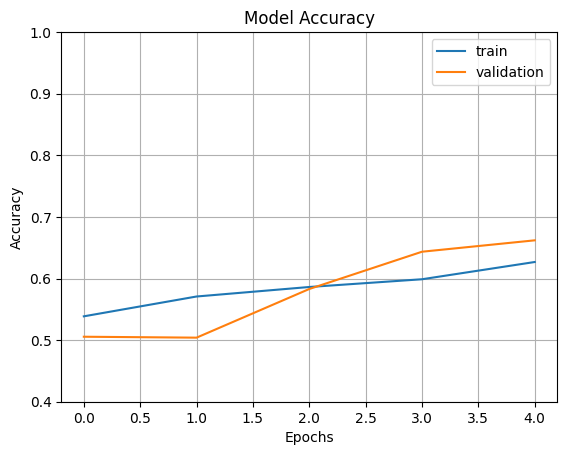

In [35]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

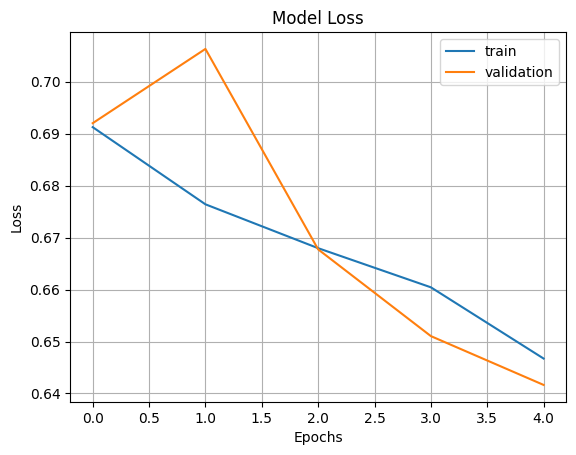

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

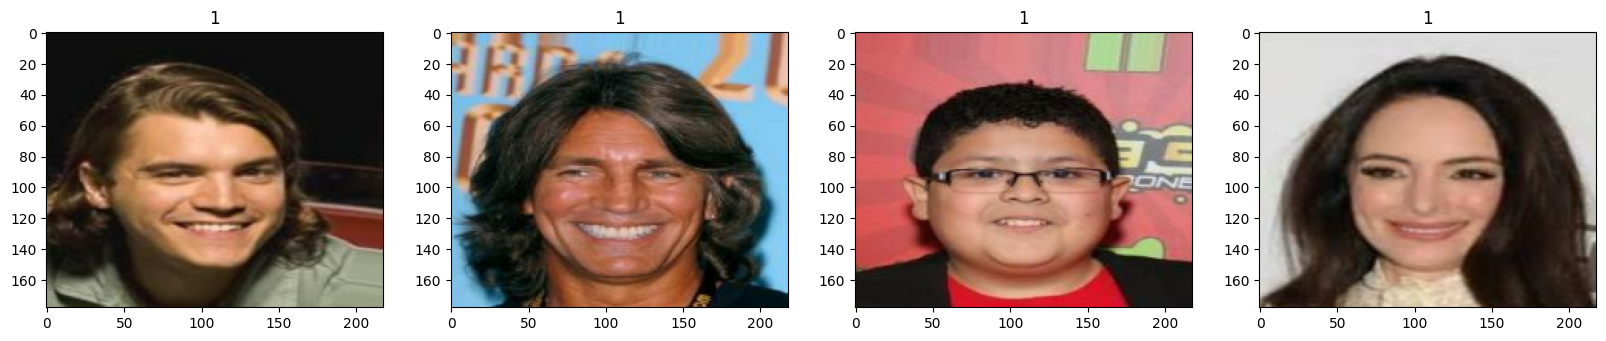

In [38]:
test_iterator = test_data.as_numpy_iterator()
#getting a batch
batch = test_iterator.next()

#Plot a batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [40]:
predictions=resnet_model(batch[0][:4])

print(predictions)

tf.Tensor(
[[0.46392947]
 [0.71546936]
 [0.36733636]
 [0.7105073 ]], shape=(4, 1), dtype=float32)
